# [Lab Session 3](fourier.ipynb)


In [27]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


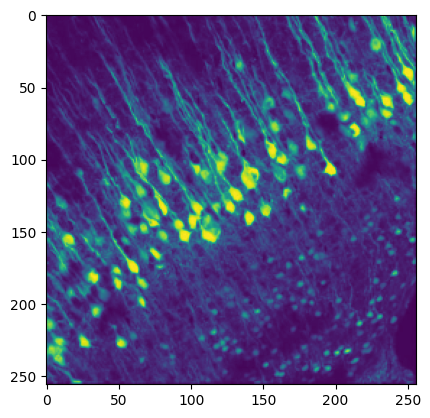

In [28]:
cell_img = plt.imread('data/cells.png')
cell_256 = resize(cell_img, (256, 256))
cell_256
plt.imshow(cell_256)

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [29]:
cell_ft = np.fft.fft2(cell_256)
cell_ft.dtype

dtype('complex128')

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [30]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)
#print(amplitude)
#print(phase)

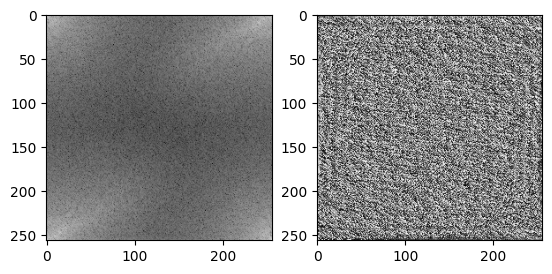

In [31]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


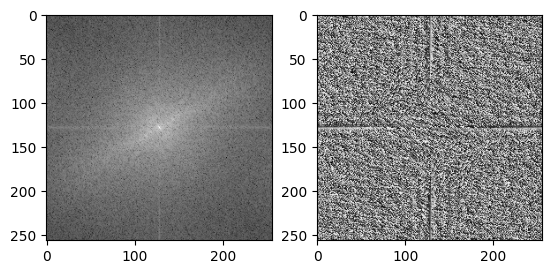

In [32]:
cell_ft2 = np.fft.fftshift(cell_ft)
amplitude2 = np.abs(cell_ft2)
phase2 = np.angle(cell_ft2)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude2), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase2, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


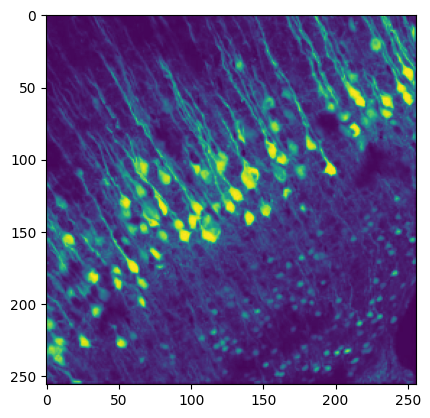

In [33]:
cell_is = np.fft.ifftshift(cell_ft2)
cell_i = np.fft.ifft2(cell_is)
plt.imshow(cell_i.real)

In [34]:
cell_img.real

array([[0.01568628, 0.01960784, 0.02352941, ..., 0.10980392, 0.09803922,
        0.01568628],
       [0.01568628, 0.01960784, 0.02745098, ..., 0.12156863, 0.09803922,
        0.00784314],
       [0.02352941, 0.02352941, 0.02745098, ..., 0.1254902 , 0.10196079,
        0.        ],
       ...,
       [0.08235294, 0.08235294, 0.08235294, ..., 0.08235294, 0.04313726,
        0.        ],
       [0.0627451 , 0.0627451 , 0.0627451 , ..., 0.09411765, 0.07058824,
        0.02352941],
       [0.01568628, 0.00784314, 0.00784314, ..., 0.01568628, 0.01960784,
        0.00784314]], dtype=float32)

---


**[Task 2 (a).]()** Load the brain CT image.


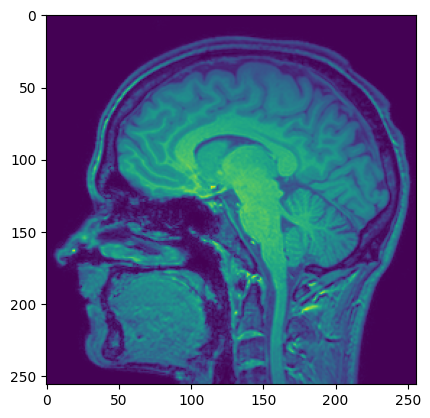

In [35]:
brain_img = plt.imread("data/brain_ct.png")
plt.imshow(brain_img)

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


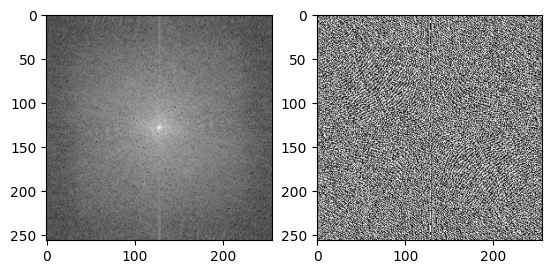

In [36]:
brain_fft = np.fft.fft2(brain_img)
brain_fs = np.fft.fftshift(brain_fft)


amplitude_brain = np.abs(brain_fs)
phase_brain = np.angle(brain_fs)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_brain), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_brain, 'gray')

In [37]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


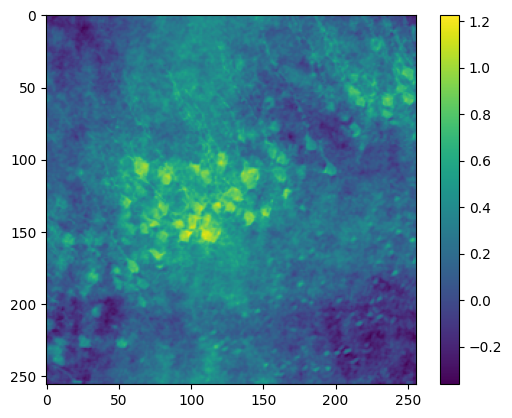

In [38]:
merg_shifted = to_complex_array(amplitude_brain, phase2)
brain_is = np.fft.ifftshift(merg_shifted)
brain_i = np.fft.ifft2(brain_is)
plt.imshow(brain_i.real)
plt.colorbar()


**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


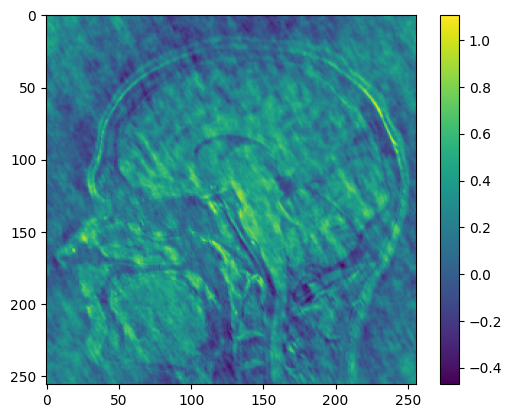

In [39]:
mergi_shifted = to_complex_array(amplitude2, phase_brain)
cell_is = np.fft.ifftshift(mergi_shifted)
celle_i = np.fft.ifft2(cell_is)
plt.imshow(celle_i.real)
plt.colorbar()

---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [40]:
filter_window_size = 50

<class 'int'>


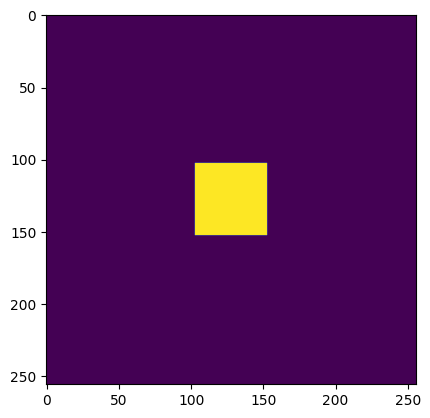

In [41]:
base = np.zeros((256,256))
middle = base.shape[0]/2
x= int(middle + filter_window_size//2)
y= int(middle - filter_window_size//2)
print(type(x))
base[y:x, y:x] = 1

plt.imshow(base)

In [42]:
np.arange(45, 56)

#type(base)
#middle + filter_window_size//2
#print(base[4:6, 4:6])

array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])

**[Task 3 (b).]()** Create a highpass filter maks.


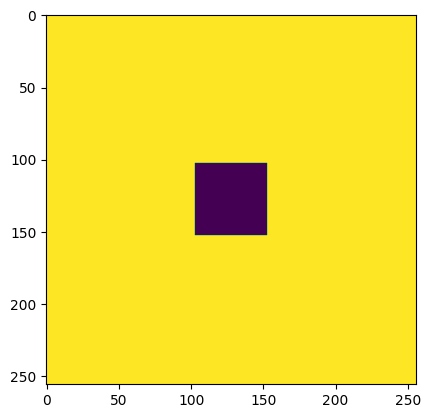

In [43]:
base2 = 1 - base
plt.imshow(base2)

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


/tmp/ipykernel_12031/1435959555.py:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(brainamp_lowpass))


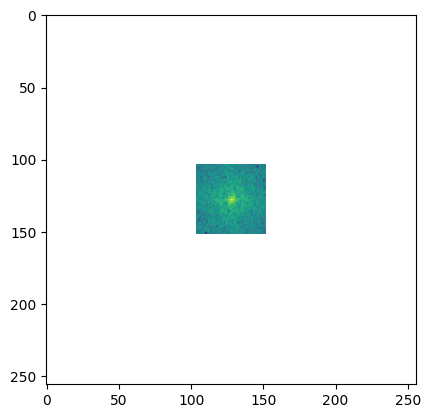

In [44]:
#amplitude_brain3 = amplitude_brain.copy()
brainamp_lowpass = amplitude_brain * base
plt.imshow(np.log(brainamp_lowpass))


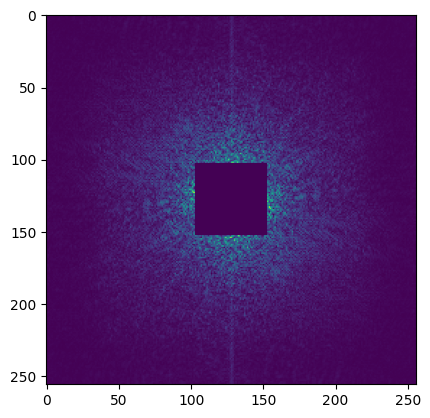

In [45]:
brainamp_highpass = amplitude_brain * base2
plt.imshow(brainamp_highpass)


**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


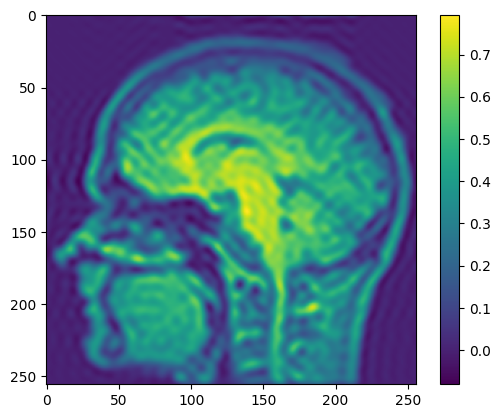

In [46]:
mask = base
ampli_brain = amplitude_brain * mask
merged_shifted = to_complex_array(ampli_brain, phase_brain)
brain_is = np.fft.ifftshift(merged_shifted)
brain_i = np.fft.ifft2(brain_is)
plt.imshow(brain_i.real)
plt.colorbar()


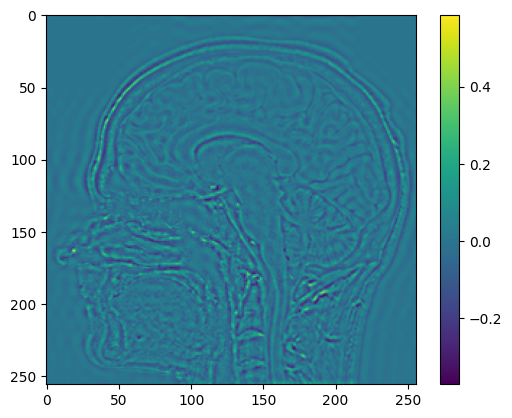

In [47]:
mask = base2
ampli_brain = amplitude_brain * mask
merged_shifted = to_complex_array(ampli_brain, phase_brain)
brain_is = np.fft.ifftshift(merged_shifted)
brain_i = np.fft.ifft2(brain_is)
plt.imshow(brain_i.real)
plt.colorbar()


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [48]:
img = brain_img
dft = np.zeros(img.shape, dtype = complex)
M, N = img.shape
M, N

(256, 256)

In [49]:
def dft(img):
    dft = np.zeros(img.shape, dtype = complex)
    M, N = img.shape
    for u in range(M): 
        for v in range(N):
            for x in range(img.shape[0]): 
                for y in range(img.shape[1]):
                    i = img[x,y]*np.exp(-2j*np.pi*(u*x/M + v*y/N))

                    dft[u, v] += i
    return(1/(M*N)*dft)


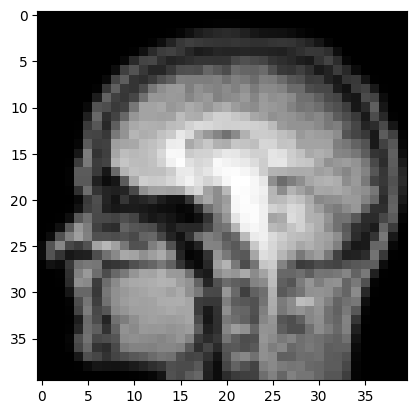

In [50]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

/tmp/ipykernel_12031/3503149828.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(phase_test), 'gray')
/tmp/ipykernel_12031/3503149828.py:9: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(phase_test), 'gray')


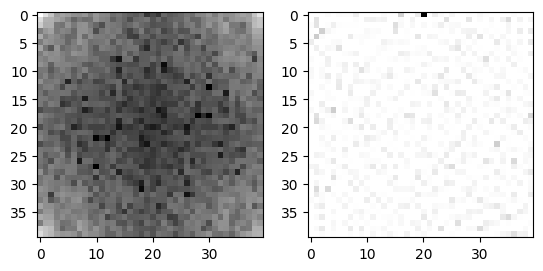

In [51]:
test_dft = dft(test_img)
amplitude_test = np.abs(test_dft)
phase_test = np.angle(test_dft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_test), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(np.log(phase_test), 'gray')


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [52]:
def idft(img):
    idft = np.zeros(img.shape, dtype = complex)
    M, N = img.shape
    for u in range(M): 
        for v in range(N):
            for x in range(img.shape[0]): 
                for y in range(img.shape[1]):
                    i = img[x,y]*np.exp(2j*np.pi*(u*x/M + v*y/N))
                    idft[u, v] += i
    return(idft)

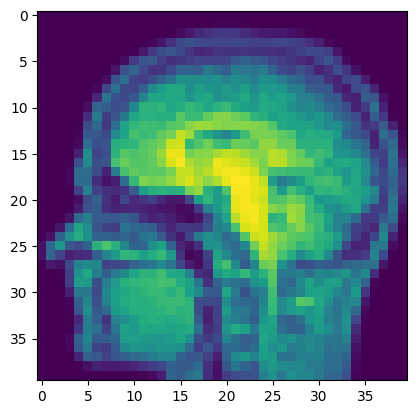

In [53]:
img_merged = to_complex_array(amplitude_test, phase_test)
test_idft = idft(img_merged)
plt.imshow(test_idft.real)


Due to high computational costs, we need to resize the image.


**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


/tmp/ipykernel_12031/919904150.py:10: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(phase_test), 'gray')
/tmp/ipykernel_12031/919904150.py:10: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(phase_test), 'gray')


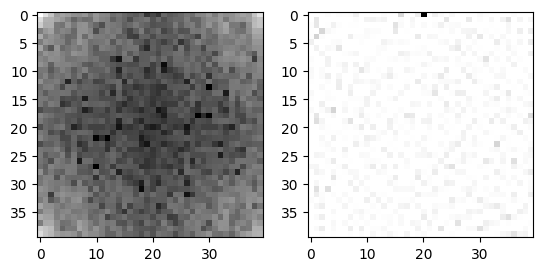

In [56]:
test_npfft = np.fft.fft2(test_img, norm = "forward")

amplitude_test = np.abs(test_npfft)
phase_test = np.angle(test_npfft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_test), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(np.log(phase_test), 'gray')







**[Task 4 (f).]()** Round the arrays and compare them again.


In [70]:
print(np.mean(np.abs(test_dft - test_npfft)))
h = 12
test_dft_round = np.round(test_dft, h)
test_npfft_round = np.round(test_npfft, h)
(test_dft_round == test_npfft_round).all()

7.541097048883874e-17


True

**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)


In [71]:
%timeit test_npfft = np.fft.fft2(test_img, norm = "forward")
%timeit test_dft

26.7 μs ± 443 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
10.6 ns ± 0.938 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)
